# Solution of Deep Learning Contest-2020

*Solution for Deep Learning Contest-2020*

https://www.kaggle.com/c/digit-recognizer/data
(The huge dataset in the above link is modified and provided during contest)*

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import math
import seaborn as sns
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import time

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Using TensorFlow backend.


## Importing and Processing Data

### Importing and Viewing Data

*Importing Data from csv file*

In [2]:
df = pd.read_csv('Dataset.csv',sep=',')

*Printing Data and its Statistics*

In [3]:
df = df.reindex(np.random.permutation(df.index))			#Shuffle
print (df)
print (df.describe())					#Gives statitics of the data

      label  Column1  Column2  Column3  Column4  Column5  Column6  Column7  \
2427      7        0        0        0        0        0        0        0   
9016      8        0        0        0        0        0        0        0   
9438      6        0        0        0        0        0        0        0   
7624      3        0        0        0        0        0        0        0   
837       7        0        0        0        0        0        0        0   
...     ...      ...      ...      ...      ...      ...      ...      ...   
3324      4        0        0        0        0        0        0        0   
4487      7        0        0        0        0        0        0        0   
4164      1        0        0        0        0        0        0        0   
9509      1        0        0        0        0        0        0        0   
4967      2        0        0        0        0        0        0        2   

      Column8  Column9  ...  Column775  Column776  Column777  C

In [4]:
X = df.loc[:, df.columns != 'label']
y_labels = df["label"]
print (X)
print (y_labels)

      Column1  Column2  Column3  Column4  Column5  Column6  Column7  Column8  \
2427        0        0        0        0        0        0        0        0   
9016        0        0        0        0        0        0        0        0   
9438        0        0        0        0        0        0        0        0   
7624        0        0        0        0        0        0        0        0   
837         0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
3324        0        0        0        0        0        0        0        0   
4487        0        0        0        0        0        0        0        0   
4164        0        0        0        0        0        0        0        0   
9509        0        0        0        0        0        0        0        0   
4967        0        0        0        0        0        0        2        0   

      Column9  Column10  ...  Column775

### Processing Data

*Setting data to train the model*

In [5]:
X = X.values
y_labels = y_labels.values

*One Hot Encoding the Output Label*

In [6]:
lb = preprocessing.LabelBinarizer()
lb.fit(y_labels)
output_classes = lb.classes_
print ("No.of Output Classes = ",output_classes)
y = lb.transform(y_labels)

No.of Output Classes =  [0 1 2 3 4 5 6 7 8 9]


### Visualising Data

*Visualising Data using Seaborn Libraries*

In [7]:
Data_y = {}

for i in output_classes:
    Data_y[i] = 0
for j in y_labels:
    Data_y[j] += 1
    
print (Data_y)

{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


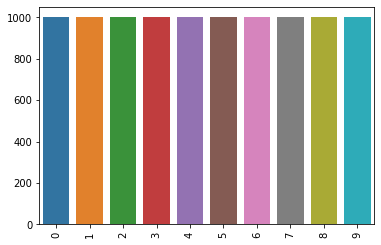

In [8]:
plt_ = sns.barplot(list(Data_y.keys()), list(Data_y.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=90)
plt.show()

### Splitting the Data for Training and Testing

*Splitting Data to Train and Test sets to train and evaluate the Model*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
print ("Shape of Training Set is",X_train.shape)
print ("Shape of Test Set is",X_test.shape)

print ("Shape of Training Set is",y_train.shape)
print ("Shape of Test Set is",y_test.shape)

Shape of Training Set is (8000, 784)
Shape of Test Set is (2000, 784)
Shape of Training Set is (8000, 10)
Shape of Test Set is (2000, 10)


## Creating a Model

*Creating a Deep Neural Network using Keras*

In [11]:
keras.backend.clear_session()
model = Sequential()
model.add(Dense(512, input_dim=784, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 485,386
Trainable params: 485,386
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 8000 samples, validate on 2000 samples
Epoch 1/50





8000/8000 [==============================] - 4s 521us/step - loss: 2.3744 - acc: 0.2124 - val_loss: 2.1877 - val_acc: 0.3100
Epoch 2/50
8000/8000 [==============================] - 0s 47us/step - loss: 2.1419 - acc: 0.3333 - val_loss: 2.0710 - val_acc: 0.4410
Epoch 3/50
8000/8000 [==============================] - 0s 45us/step - loss: 2.0154 - acc: 0.4886 - val_loss: 1.9258 - val_acc: 0.5535
Epoch 4/50
8000/8000 [==============================] - 0s 45us/step - loss: 1.8736 - acc: 0.5801 - val_loss: 1.7827 - val_acc: 0.5450
Epoch 5/50
8000/8000 [==============================] - 0s 45us/step - loss: 1.7372 - acc: 0.5207 - val_loss: 1.6520 - val_acc: 0.5295
Epoch 6/50
8000/8000 [==============================] - 0s 45us/step - loss: 1.6081 - acc: 0.5349 - val_loss: 1.5283 - val_acc: 0.5635
Epoch 7/50
8000/8000 [=================

8000/8000 [==============================] - 0s 46us/step - loss: 0.4232 - acc: 0.8599 - val_loss: 0.4899 - val_acc: 0.8375
Epoch 46/50
8000/8000 [==============================] - 0s 44us/step - loss: 0.4233 - acc: 0.8634 - val_loss: 0.5010 - val_acc: 0.8245
Epoch 47/50
8000/8000 [==============================] - 0s 45us/step - loss: 0.4232 - acc: 0.8593 - val_loss: 0.4948 - val_acc: 0.8305
Epoch 48/50
8000/8000 [==============================] - 0s 46us/step - loss: 0.4186 - acc: 0.8613 - val_loss: 0.4871 - val_acc: 0.8355
Epoch 49/50
8000/8000 [==============================] - 0s 48us/step - loss: 0.4132 - acc: 0.8641 - val_loss: 0.4819 - val_acc: 0.8310
Epoch 50/50
8000/8000 [==============================] - 0s 53us/step - loss: 0.4136 - acc: 0.8645 - val_loss: 0.4888 - val_acc: 0.8310
Total Time taken = 24.134924173355103


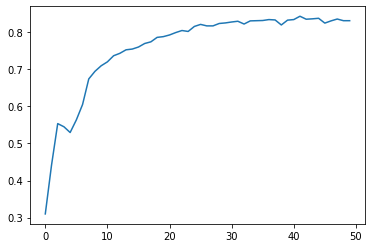

In [14]:
start = time.time()
history = model.fit(X, y, epochs=50, validation_split = 0.2, batch_size = 2048)
end = time.time()
print ("Total Time taken =",end-start)
history_dict = history.history
val_acc = list(history_dict['val_acc'])

plt.plot(val_acc)
plt.show()
